In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
df = pd.read_csv("new_pullreq.csv")

In [4]:
columns = df.columns.to_list()
print(columns)

['id', 'project_id', 'github_id', 'pull_request_id', 'ownername', 'reponame', 'merged_or_not', 'lifetime_minutes', 'mergetime_minutes', 'num_commits', 'src_churn', 'test_churn', 'files_added', 'files_deleted', 'files_modified', 'files_changed', 'src_files', 'doc_files', 'other_files', 'num_commit_comments', 'num_issue_comments', 'num_comments', 'num_participants', 'sloc', 'team_size', 'perc_external_contribs', 'commits_on_files_touched', 'test_lines_per_kloc', 'test_cases_per_kloc', 'asserts_per_kloc', 'watchers', 'prev_pullreqs', 'requester_succ_rate', 'followers', 'churn_addition', 'churn_deletion', 'pr_comment_num', 'comment_num', 'perc_neg_emotion', 'perc_pos_emotion', 'perc_neu_emotion', 'part_num_issue', 'part_num_commit', 'part_num_pr', 'part_num_code', 'comment_conflict', 'hash_tag', 'at_tag', 'test_inclusion', 'description_length', 'bug_fix', 'ci_exists', 'ci_latency', 'ci_build_num', 'ci_test_passed', 'ci_failed_perc', 'ci_first_build_status', 'ci_last_build_status', 'languag

In [5]:
df["merged_or_not"]

0          1
1          0
2          1
3          1
4          1
          ..
3347932    1
3347933    0
3347934    1
3347935    0
3347936    1
Name: merged_or_not, Length: 3347937, dtype: int64

In [6]:
print(df["merged_or_not"].isnull().sum())
accepted = 0
rejected = 0
for ind in df.index:
    if df["merged_or_not"][ind]==1:
        accepted=accepted+1
    else:
        rejected=rejected+1
print("Accepted:",accepted)
print("Percentage:", (accepted/len(df))*100)
print("Rejected:", rejected)
print("Percentage:", (rejected/len(df))*100)

0
Accepted: 2710096
Percentage: 80.94823767591804
Rejected: 637841
Percentage: 19.051762324081963


In [7]:
new_df = df[['acc_commit_num', 'first_pr', 'core_member',
                        'contrib_gender', 'same_country', 'same_affiliation',
                        'social_strength', 'account_creation_days',
                        'first_response_time', 'contrib_country',
                        'prior_interaction', 'contrib_affiliation', 'perc_external_contribs',
                        'contrib_first_emo', 'contrib_follow_integrator', 
            'language', 'project_age', 'pushed_delta',
                    'pr_succ_rate', 'open_issue_num', 'open_pr_num', 'fork_num',
            'churn_addition', 'bug_fix', 'test_inclusion',
                    'hash_tag', 'at_tag', 'part_num_issue', 'part_num_commit', 
                    'part_num_pr', 'part_num_code','ci_exists', 'ci_latency',
                    'ci_test_passed', 'ci_failed_perc', 'churn_deletion',
                    'description_length', 'comment_conflict', 'pr_comment_num',
                    'part_num_code', 'ci_build_num', 'perc_inte_neg_emo', 'perc_inte_pos_emo',
                    'perc_inte_neu_emo','ci_first_build_status', 'ci_last_build_status',
            'merged_or_not']]

In [8]:
new_df.isnull().sum()

acc_commit_num                     0
first_pr                           0
core_member                        0
contrib_gender                694396
same_country                 2238549
same_affiliation             2707224
social_strength                  250
account_creation_days              0
first_response_time          1700048
contrib_country              1874929
prior_interaction                  0
contrib_affiliation          2496936
perc_external_contribs          4071
contrib_first_emo            2259030
contrib_follow_integrator          0
language                           0
project_age                        0
pushed_delta                   20542
pr_succ_rate                   10203
open_issue_num                     0
open_pr_num                        0
fork_num                           0
churn_addition                     0
bug_fix                      3324411
test_inclusion                     0
hash_tag                           0
at_tag                             0
p

<AxesSubplot:>

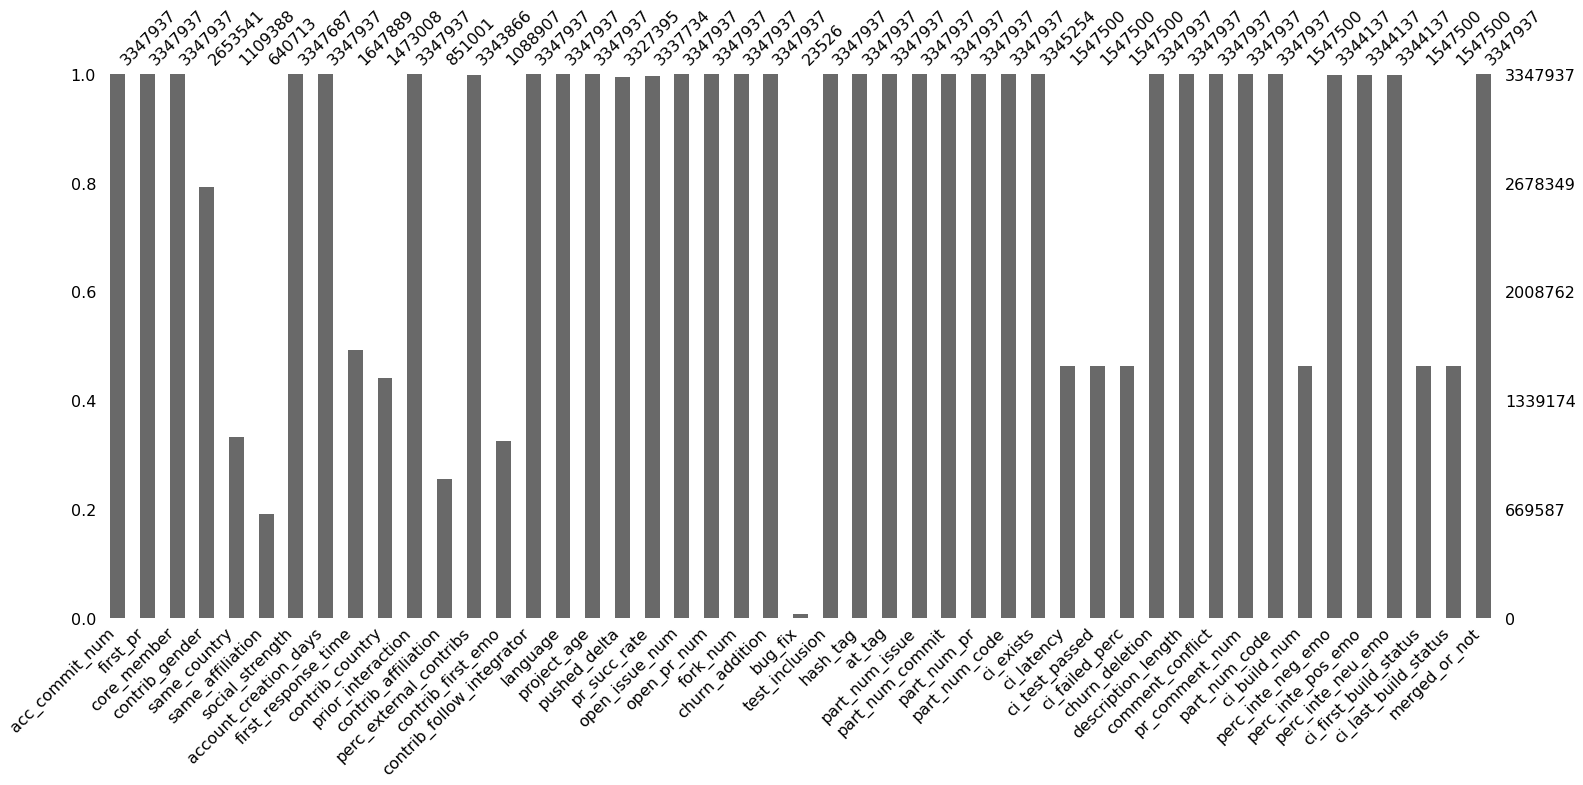

In [9]:
msno.bar(new_df)

In [13]:
new_df.drop('same_affiliation', axis=1, inplace=True)
new_df.drop('same_country', axis=1, inplace=True)
new_df.drop('contrib_affiliation', axis=1, inplace= True)
new_df.drop('bug_fix', axis=1, inplace=True)

In [14]:
new_df.head(4)

,acc_commit_num,first_pr,core_member,contrib_gender,social_strength,account_creation_days,first_response_time,contrib_country,prior_interaction,perc_external_contribs,...,comment_conflict,pr_comment_num,part_num_code,ci_build_num,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,ci_first_build_status,ci_last_build_status,merged_or_not
0,28,0,0,NaN,0.000000,353,237.0,NaN,28,0.089869,...,0,0,0,1.0,0.0,0.0,1.0,success,success,1
1,432,0,1,NaN,0.250000,1092,NaN,NaN,300,0.014019,...,0,0,0,1.0,0.0,0.0,0.0,failure,failure,0
2,652,0,1,male,0.428571,1884,NaN,malaysia,505,0.256849,...,0,0,0,1.0,0.0,0.0,0.0,success,success,1
3,1050,0,1,male,0.138889,3489,NaN,canada,460,0.014706,...,0,0,0,1.0,0.0,0.0,0.0,success,success,1


<AxesSubplot:>

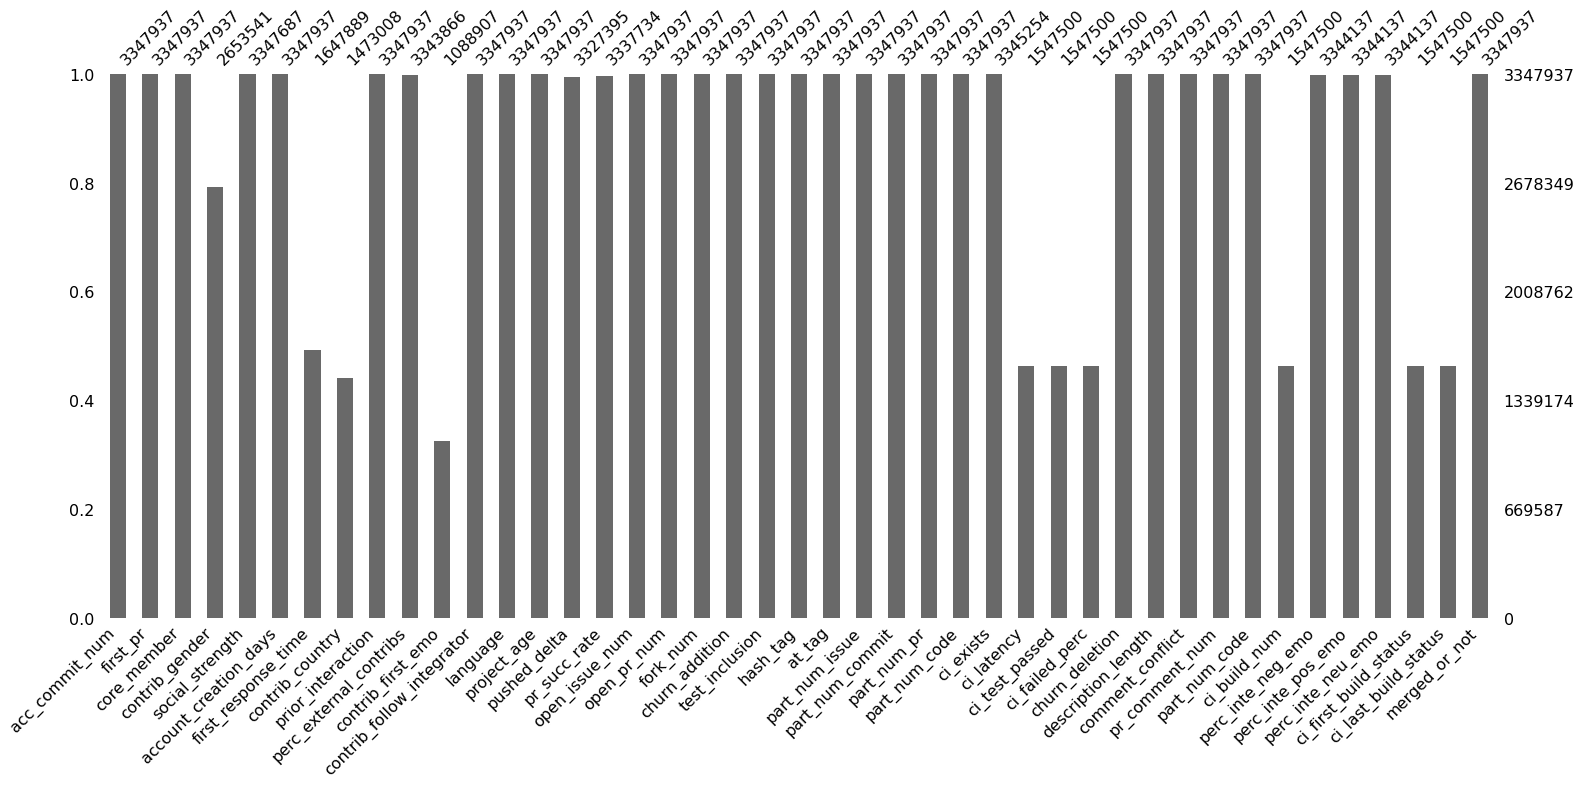

In [15]:
msno.bar(new_df)